In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple

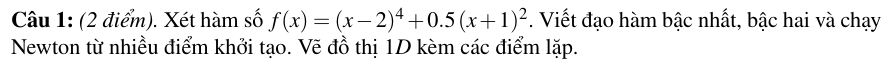

In [1]:
def f1(x):
    return (x - 2)**4 + 0.5 * (x + 1)**2

In [2]:
def grad_f1(x):
    return 4*(x-2)**3 + (x+1)

In [4]:
def hes_f1(x):
    return 12*(x-2)**2 + 1

In [19]:
def backtracking_1d(f: Callable[[float], float], df: Callable[[float], float], x: float,
                    p: float, alpha_init: float = 1.0, rho: float = 0.5, c: float = 1e-4) -> float:
    fx = f(x)
    g = df(x)
    alpha = alpha_init
    while f(x + alpha * p) > fx + c * alpha * g * p:
        alpha *= rho
        if alpha < 1e-12:
            break
    return alpha

def newton_1d(f: Callable[[float], float], df: Callable[[float], float], d2f: Callable[[float], float],
              x0: float, max_iter: int = 50, tol: float = 1e-8) -> tuple[float, list]:
    x = float(x0)
    hist = [x]
    for _ in range(max_iter):
        g = df(x)
        if abs(g) < tol:
            break
        H = d2f(x)
        # tr√°nh chia cho 0, th√™m ƒë·ªám nh·ªè n·∫øu c·∫ßn
        if abs(H) < 1e-12:
            H = 1e-12 if H >= 0 else -1e-12
        p = - g / H
        alpha = backtracking_1d(f, df, x, p)
        x = x + alpha * p
        hist.append(x)
    return x, hist


In [29]:
starts = [-4.0, 0.0, 4.0]
traj_4=[]
for x0 in starts:
    x_star, hist = newton_1d(f1, grad_f1, hes_f1, x0)
    traj_4.append((x0, x_star, hist))
    print(f'Init {x0:5.1f} -> x*={x_star:.6f}, f*={f1(x_star):.6e}, iters={len(hist)-1}')

Init  -4.0 -> x*=1.182817, f*=2.828286e+00, iters=9
Init   0.0 -> x*=1.182817, f*=2.828286e+00, iters=6
Init   4.0 -> x*=1.182817, f*=2.828286e+00, iters=9


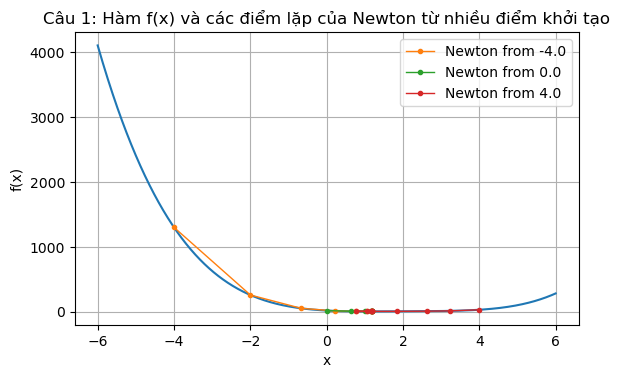

In [36]:
# Plot function and iterates
xs = np.linspace(-6, 6, 1000)
plt.figure(figsize=(6.5,3.8))
plt.plot(xs, f1(xs))
for x0, x_star, hist in traj_4:
    pts_x = np.array(hist)
    pts_y = np.array([f1(x) for x in pts_x])
    plt.plot(pts_x, pts_y, '-o', ms=3, lw=1, label=f'Newton from {x0}')
plt.title("C√¢u 1: H√†m f(x) v√† c√°c ƒëi·ªÉm l·∫∑p c·ªßa Newton t·ª´ nhi·ªÅu ƒëi·ªÉm kh·ªüi t·∫°o")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

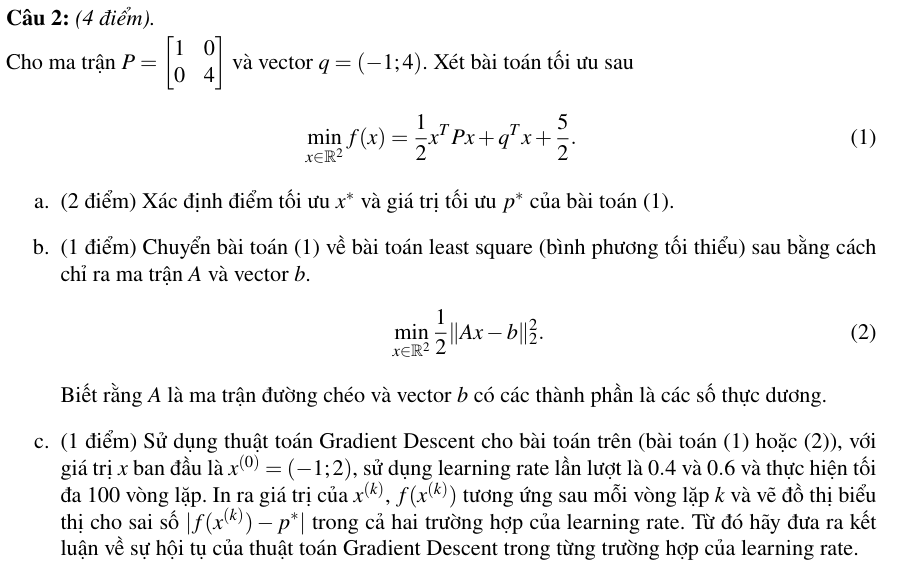

In [2]:
P = np.array([[1.0, 0.0],[0.0,4.0]])
q = np.array([-1.0, 4.0])

# a

In [41]:
x_star = -np.linalg.inv(P) @ q
p_star = 0.5 * x_star.T @ P @ x_star + q.T @ x_star + 5/2

print(" ƒëi·ªÉm t·ªëi ∆∞u =", x_star)
print(" Gi√° tr·ªã t·ªëi ∆∞u =", p_star, "\n")

 ƒëi·ªÉm t·ªëi ∆∞u = [ 1. -1.]
 Gi√° tr·ªã t·ªëi ∆∞u = 0.0 



In [54]:
x0 = np.array([-1.0,2.0])

def grad(x): 
    return P.dot(x) + q
def f(x): 
    return 0.5*x.dot(P).dot(x) + q.dot(x) + 2.5

def gradient_descent(f, grad_f, x_init, learning_rate, num_iterations, tolerance=1e-8):
    x = np.array(x_init, dtype=float)
    history = {
        'x': [x.copy()],
        'f': [f(x)],
        'gradient': [grad_f(x).copy()],
        'gradient_norm': [np.linalg.norm(grad_f(x))]
    }
    
    for i in range(num_iterations):
        gradient = grad_f(x)
        gradient_norm = np.linalg.norm(gradient)
        
        # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng
        if gradient_norm < tolerance:
            #print(f"H·ªôi t·ª• t·∫°i iteration {i+1}, ||gradient|| = {gradient_norm:.2e}")
            break
        
        # TODO: C·∫≠p nh·∫≠t x theo c√¥ng th·ª©c: x_new = x_old - learning_rate * gradient
        x_new = x - learning_rate * gradient
        x = x_new
        
        # L∆∞u l·ªãch s·ª≠
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['gradient'].append(gradient.copy())
        history['gradient_norm'].append(gradient_norm)
    
    return history


hist = gradient_descent(f, grad,x0, 0.4, 50)
print(f"ƒêi·ªÉm cu·ªëi: x = [{hist['x'][-1][0]:.6f}, {hist['x'][-1][1]:.6f}]")
print(f"Gi√° tr·ªã h√†m: f(x) = {hist['f'][-1]:.6f}")

ƒêi·ªÉm cu·ªëi: x = [1.000000, -1.000000]
Gi√° tr·ªã h√†m: f(x) = 0.000000


# b
$$\frac{1}{2}\|Ax - b\|^2 = \frac{1}{2}x^\top P x + q^\top x + \text{const}.$$

Quan h·ªá so s√°nh cho b√†i to√°n to√†n ph∆∞∆°ng:

$$A^\top A = P, \qquad q = -A^\top b.$$

V√¨ \(P\) l√† ma tr·∫≠n ch√©o d∆∞∆°ng, ta ch·ªçn:

$$A = \sqrt{P} = \mathrm{diag}(1, 2)$$

(l√† ma tr·∫≠n ƒë·ªëi x·ª©ng).  
T·ª´ \(q = -A^\top b = -A b\) (v√¨ \(A\) ƒë·ªëi x·ª©ng), ta c√≥:

$$b = -A^{-1} q.$$

In [55]:
A = np.sqrt(P)
b = -np.linalg.inv(A) @ q  # since q = -A^T b and A symmetric -> b = -A^{-1} q
# Verify equivalence: 0.5||Ax-b||^2 = 0.5 x^T P x + q^T x + const
const = 0.5 * b.T @ b
print("C√¢u 2b)")
print(" A =\n", A)
print(" b =", b)
print(" constant term (1/2 b^T b) =", const)
# check q vs -A^T b
print(" Check q vs -A^T b:", -A.T @ b, " (should equal q)\n")

C√¢u 2b)
 A =
 [[1. 0.]
 [0. 2.]]
 b = [ 1. -2.]
 constant term (1/2 b^T b) = 2.5
 Check q vs -A^T b: [-1.  4.]  (should equal q)



# c

ƒêi·ªÉm t·ªëi ∆∞u gi·∫£i t√≠ch x* = [ 1. -1.]
Gi√° tr·ªã t·ªëi ∆∞u p* = 0.0

===== Learning rate = 0.4 =====
k =   0, x^0 = [-1.  2.], f(x^0) = 20.000000
k =   1, x^1 = [-0.2 -2.8], f(x^1) = 7.200000
k =   2, x^2 = [0.28 0.08], f(x^2) = 2.592000
k =   3, x^3 = [ 0.568 -1.648], f(x^3) = 0.933120
k =   4, x^4 = [ 0.7408 -0.6112], f(x^4) = 0.335923
k =   5, x^5 = [ 0.84448 -1.23328], f(x^5) = 0.120932
k =   6, x^6 = [ 0.906688 -0.860032], f(x^6) = 0.043536
k =   7, x^7 = [ 0.944013 -1.083981], f(x^7) = 0.015673
k =   8, x^8 = [ 0.966408 -0.949612], f(x^8) = 0.005642
k =   9, x^9 = [ 0.979845 -1.030233], f(x^9) = 0.002031
k =  10, x^10 = [ 0.987907 -0.98186 ], f(x^10) = 0.000731
k =  11, x^11 = [ 0.992744 -1.010884], f(x^11) = 0.000263
k =  12, x^12 = [ 0.995646 -0.99347 ], f(x^12) = 0.000095
k =  13, x^13 = [ 0.997388 -1.003918], f(x^13) = 0.000034
k =  14, x^14 = [ 0.998433 -0.997649], f(x^14) = 0.000012
k =  15, x^15 = [ 0.99906  -1.001411], f(x^15) = 0.000004
k =  16, x^16 = [ 0.999436

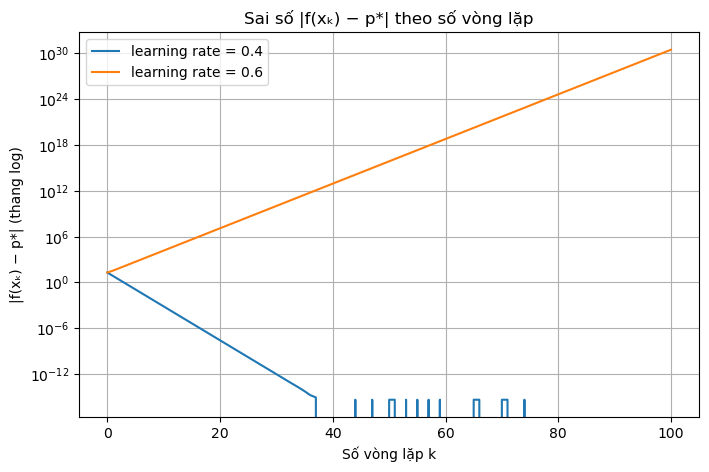

In [3]:
x0 = np.array([-1.0, 2.0])

# H√†m m·ª•c ti√™u v√† gradient
def f(x):
    return 0.5 * x.T @ P @ x + q.T @ x + 2.5

def grad(x):
    return P @ x + q

# Nghi·ªám t·ªëi ∆∞u gi·∫£i t√≠ch (ƒë·ªÉ t√≠nh sai s·ªë)
x_star = -np.linalg.inv(P) @ q
p_star = f(x_star)

print("ƒêi·ªÉm t·ªëi ∆∞u gi·∫£i t√≠ch x* =", x_star)
print("Gi√° tr·ªã t·ªëi ∆∞u p* =", p_star)

# -----------------------------
# H√†m th·ª±c hi·ªán Gradient Descent
# -----------------------------
def gradient_descent(x0, alpha, max_iter=100):
    x = x0.copy().astype(float)
    xs, fs = [x.copy()], [f(x)]
    
    for k in range(max_iter):
        g = grad(x)
        x = x - alpha * g
        xs.append(x.copy())
        fs.append(f(x))
    
    return np.array(xs), np.array(fs)

# -----------------------------
# Th·ª±c hi·ªán cho hai learning rate: 0.4 v√† 0.6
# -----------------------------
learning_rates = [0.4, 0.6]
results = {}

for lr in learning_rates:
    xs, fs = gradient_descent(x0, lr, max_iter=100)
    results[lr] = (xs, fs)
    print(f"\n===== Learning rate = {lr} =====")
    for k in range(len(xs)):
        print(f"k = {k:3d}, x^{k} = {np.round(xs[k], 6)}, f(x^{k}) = {fs[k]:.6f}")

# -----------------------------
# V·∫Ω ƒë·ªì th·ªã sai s·ªë |f(x_k) - p*|
# -----------------------------
plt.figure(figsize=(8,5))
for lr in learning_rates:
    fs = results[lr][1]
    errors = np.abs(fs - p_star)
    plt.semilogy(errors, label=f"learning rate = {lr}")

plt.title("Sai s·ªë |f(x‚Çñ) ‚àí p*| theo s·ªë v√≤ng l·∫∑p")
plt.xlabel("S·ªë v√≤ng l·∫∑p k")
plt.ylabel("|f(x‚Çñ) ‚àí p*| (thang log)")
plt.legend()
plt.grid(True, which="both")
plt.show()

- Khi ch·∫°y v·ªõi learning rate = 0.4 ‚Üí gi√° tr·ªã h·ªôi t·ª• d·∫ßn v·ªÅ ùë•‚àó=(1,‚àí1),f(x) ‚Üí 0.

- Khi ch·∫°y v·ªõi learning rate = 0.6 ‚Üí gi√° tr·ªã dao ƒë·ªông v√† f(x) tƒÉng v·ªçt (kh√¥ng h·ªôi t·ª•).

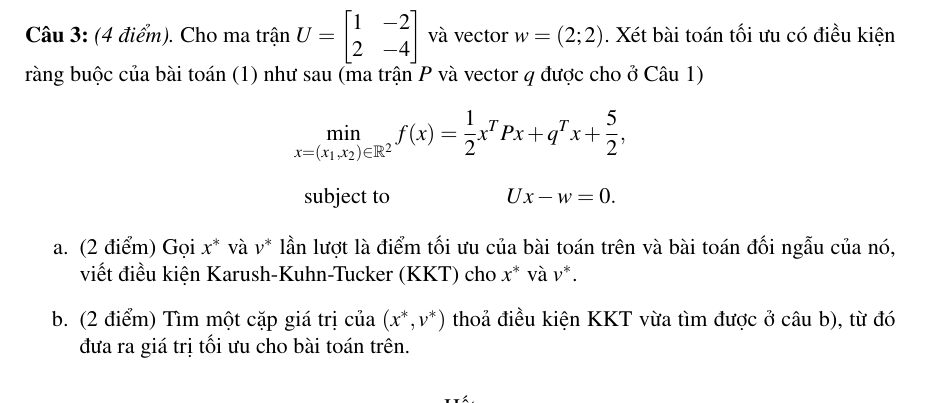

In [4]:
import numpy as np

P = np.array([[1.,0.],[0.,4.]])
q = np.array([-1.,4.])
U = np.array([[1.,-2.],[2.,-4.]])
w = np.array([2.,2.])

## a. ‚úçÔ∏è Vi·∫øt ƒëi·ªÅu ki·ªán Karush-Kuhn-Tucker (KKT) cho $x^*$ v√† $v^*$ (2 ƒëi·ªÉm)

B√†i to√°n t·ªëi ∆∞u c√≥ d·∫°ng Quy ho·∫°ch b·∫≠c hai v·ªõi r√†ng bu·ªôc ƒë·∫≥ng th·ª©c:
$$\min_{x \in \mathbb{R}^2} f(x) = \frac{1}{2} x^T P x + q^T x + \frac{5}{2}, \quad \text{subject to} \quad U x - w = 0.$$

V·ªõi:
$$P = \begin{pmatrix} 1 & 0 \\ 0 & 4 \end{pmatrix}, \quad q = \begin{pmatrix} -1 \\ 4 \end{pmatrix}, \quad U = \begin{pmatrix} 1 & -2 \\ 2 & -4 \end{pmatrix}, \quad w = \begin{pmatrix} 2 \\ 2 \end{pmatrix}.$$

### 1. H√†m Lagrange

H√†m Lagrange $L(x, v)$ ƒë∆∞·ª£c x√¢y d·ª±ng b·∫±ng c√°ch ƒë∆∞a r√†ng bu·ªôc ƒë·∫≥ng th·ª©c $U x - w = 0$ v√†o h√†m m·ª•c ti√™u v·ªõi vector nh√¢n t·ª≠ Lagrange $v = (v_1, v_2)^T$:

$$L(x, v) = f(x) + v^T (U x - w) = \frac{1}{2} x^T P x + q^T x + \frac{5}{2} + v^T (U x - w).$$

### 2. ƒêi·ªÅu ki·ªán KKT

C·∫∑p **ƒëi·ªÉm t·ªëi ∆∞u ban ƒë·∫ßu** $x^*$ v√† **vector nh√¢n t·ª≠ Lagrange t·ªëi ∆∞u** $v^*$ (c√≤n g·ªçi l√† ƒëi·ªÉm KKT) ph·∫£i th·ªèa m√£n c√°c ƒëi·ªÅu ki·ªán sau:

* **ƒêi·ªÅu ki·ªán d·ª´ng (Stationarity Condition):** Gradient c·ªßa H√†m Lagrange theo $x$ b·∫±ng 0.
    $$\nabla_x L(x^*, v^*) = 0 \iff \mathbf{P x^* + q + U^T v^* = 0}$$

* **ƒêi·ªÅu ki·ªán kh·∫£ thi ban ƒë·∫ßu (Primal Feasibility Condition):** R√†ng bu·ªôc ƒë·∫≥ng th·ª©c ph·∫£i ƒë∆∞·ª£c th·ªèa m√£n.
    $$\mathbf{U x^* - w = 0}$$

### 3. H·ªá ph∆∞∆°ng tr√¨nh tuy·∫øn t√≠nh KKT

Vi·∫øt l·∫°i d∆∞·ªõi d·∫°ng h·ªá ph∆∞∆°ng tr√¨nh ma tr·∫≠n, ta c√≥:
$$\begin{cases} P x^* + U^T v^* = -q \\ U x^* = w \end{cases}$$

Thay c√°c ma tr·∫≠n v√† vector c·ª• th·ªÉ v√†o, ta ƒë∆∞·ª£c h·ªá 4 ph∆∞∆°ng tr√¨nh tuy·∫øn t√≠nh v·ªõi 4 ·∫©n $(x_1^*, x_2^*, v_1^*, v_2^*)$:
$$\begin{pmatrix} P & U^T \\ U & 0 \end{pmatrix} \begin{pmatrix} x^* \\ v^* \end{pmatrix} = \begin{pmatrix} -q \\ w \end{pmatrix}$$

$$\mathbf{\begin{pmatrix} 1 & 0 & 1 & 2 \\ 0 & 4 & -2 & -4 \\ 1 & -2 & 0 & 0 \\ 2 & -4 & 0 & 0 \end{pmatrix} \begin{pmatrix} x_1^* \\ x_2^* \\ v_1^* \\ v_2^* \end{pmatrix} = \begin{pmatrix} 1 \\ -4 \\ 2 \\ 2 \end{pmatrix}}$$

In [6]:
# --- 1. Ph√¢n t√≠ch R√†ng bu·ªôc (U x = w) ---
# Ki·ªÉm tra h·∫°ng (rank) c·ªßa ma tr·∫≠n U v√† ma tr·∫≠n m·ªü r·ªông [U | w]
rank_U = np.linalg.matrix_rank(U)
U_augmented = np.column_stack((U, w))
rank_U_augmented = np.linalg.matrix_rank(U_augmented)

print(f"H·∫°ng (rank) c·ªßa ma tr·∫≠n U: {rank_U}")
print(f"H·∫°ng (rank) c·ªßa ma tr·∫≠n m·ªü r·ªông [U | w]: {rank_U_augmented}")
print("-" * 30)

if rank_U != rank_U_augmented:
    print("K·∫æT LU·∫¨N: H·ªá r√†ng bu·ªôc U x = w l√† V√î NGHI·ªÜM.")
    print("B√†i to√°n t·ªëi ∆∞u l√† KH√îNG KH·∫¢ THI (INFEASIBLE).")
    print("Kh√¥ng t·ªìn t·∫°i c·∫∑p (x*, v*) th·ªèa m√£n KKT.")

H·∫°ng (rank) c·ªßa ma tr·∫≠n U: 1
H·∫°ng (rank) c·ªßa ma tr·∫≠n m·ªü r·ªông [U | w]: 2
------------------------------
K·∫æT LU·∫¨N: H·ªá r√†ng bu·ªôc U x = w l√† V√î NGHI·ªÜM.
B√†i to√°n t·ªëi ∆∞u l√† KH√îNG KH·∫¢ THI (INFEASIBLE).
Kh√¥ng t·ªìn t·∫°i c·∫∑p (x*, v*) th·ªèa m√£n KKT.


In [7]:
# --- D·ªØ li·ªáu B√†i to√°n C√ì NGHI·ªÜM ---
# Thay ƒë·ªïi w ƒë·ªÉ h·ªá r√†ng bu·ªôc U x = w c√≥ nghi·ªám (h·ªá ph·ª• thu·ªôc tuy·∫øn t√≠nh)
w_new = np.array([1., 2.])

# --- 1. Thi·∫øt l·∫≠p H·ªá KKT ---

# Ma tr·∫≠n KKT K = [[P, U^T], [U, 0]]
K = np.block([[P, U.T],
              [U, np.zeros((2, 2))]])

# Vector v·∫ø ph·∫£i rhs = [-q, w_new]
rhs = np.concatenate((-q, w_new))

print("Ma tr·∫≠n KKT (K):\n", K)
print("-" * 30)
print("Vector v·∫ø ph·∫£i (rhs):\n", rhs)
print("-" * 30)

# --- 2. Gi·∫£i H·ªá KKT (K z = rhs) ---
# S·ª≠ d·ª•ng np.linalg.lstsq ƒë·ªÉ t√¨m l·ªùi gi·∫£i t·ªëi thi·ªÉu b√¨nh ph∆∞∆°ng
# ƒê√¢y l√† c√°ch ƒë√°ng tin c·∫≠y h∆°n khi ma tr·∫≠n K b·ªã suy bi·∫øn (rank < dimension)

# z_kkt l√† nghi·ªám x·∫•p x·ªâ/nghi·ªám c·ª• th·ªÉ
z_kkt, residuals, rank_K, singular_values = np.linalg.lstsq(K, rhs, rcond=None)
 
# T√°ch nghi·ªám
x_star = z_kkt[:2]
v_star = z_kkt[2:]

print("\n--- K·∫æT QU·∫¢ GI·∫¢I KKT ---")
print(f"H·∫°ng c·ªßa ma tr·∫≠n KKT: {rank_K}")
print(f"Vector nghi·ªám z* = [x*, v*]: {z_kkt}")
print("-" * 30)
print(f"ƒêi·ªÉm t·ªëi ∆∞u ban ƒë·∫ßu x*: {x_star}")
print(f"Vector nh√¢n t·ª≠ Lagrange v*: {v_star}")

# --- 3. T√≠nh Gi√° tr·ªã T·ªëi ∆∞u ---
# f(x) = 1/2 * x^T * P * x + q^T * x + 5/2
f_star = 0.5 * x_star @ P @ x_star + q @ x_star + 2.5
print(f"\nGi√° tr·ªã t·ªëi ∆∞u f(x*): {f_star}")

Ma tr·∫≠n KKT (K):
 [[ 1.  0.  1.  2.]
 [ 0.  4. -2. -4.]
 [ 1. -2.  0.  0.]
 [ 2. -4.  0.  0.]]
------------------------------
Vector v·∫ø ph·∫£i (rhs):
 [ 1. -4.  1.  2.]
------------------------------

--- K·∫æT QU·∫¢ GI·∫¢I KKT ---
H·∫°ng c·ªßa ma tr·∫≠n KKT: 3
Vector nghi·ªám z* = [x*, v*]: [-7.13204384e-16 -5.00000000e-01  2.00000000e-01  4.00000000e-01]
------------------------------
ƒêi·ªÉm t·ªëi ∆∞u ban ƒë·∫ßu x*: [-7.13204384e-16 -5.00000000e-01]
Vector nh√¢n t·ª≠ Lagrange v*: [0.2 0.4]

Gi√° tr·ªã t·ªëi ∆∞u f(x*): 1.0000000000000002
